## MLPをkerasでやってみよう

In [16]:
from __future__ import print_function
import numpy as np
np.random.seed(20170214)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from matplotlib import pyplot as plt

%matplotlib inline

In [10]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

学習にはMNISTのデータを使うので、読み込みましょう。

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 1536/60000 [..............................] - ETA: 7s - loss: 0.1408 - acc: 0.9551

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 6s 102us/step - loss: 0.1122 - acc: 0.9663 - val_loss: 0.0907 - val_acc: 0.9744
Epoch 2/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0806 - acc: 0.9757 - val_loss: 0.0834 - val_acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0620 - acc: 0.9812 - val_loss: 0.0940 - val_acc: 0.9731
Epoch 4/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0861 - val_acc: 0.9782
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0458 - acc: 0.9869 - val_loss: 0.0879 - val_acc: 0.9784


In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08792311586488213
Test accuracy: 0.9784


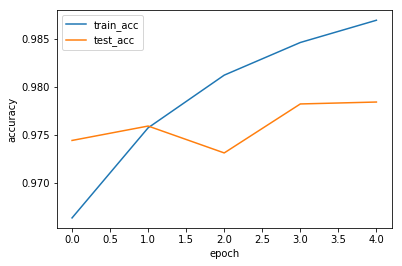

In [20]:
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='test_acc')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.clf()

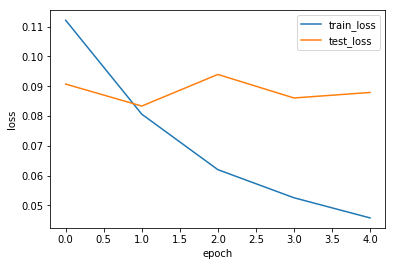

In [19]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()